# Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

# Import Dataset

In [2]:
df = pd.read_csv('cleaned_citibike_data.csv', index_col = 0)

In [3]:
df.dtypes

rideable_type          object
started_at             object
ended_at               object
start_station_name     object
end_station_name       object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [4]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
ride_id,,,,,,,,,,,,
25098D3FFB6B3BBD,electric_bike,2022-07-04 17:00:41.408,2022-07-04 17:19:00.525,Central Park West & W 85 St,Grand Army Plaza & Central Park S,40.784760,-73.969862,40.764397,-73.973715,casual,2022-07-04,25.6
FCED437CC64165BA,classic_bike,2022-01-14 09:18:35.838,2022-01-14 09:27:58.570,W 4 St & 7 Ave S,W 16 St & The High Line,40.734011,-74.002939,40.743349,-74.006818,member,2022-01-14,4.8
22DE76A19BAD1251,electric_bike,2022-10-09 17:35:17.370,2022-10-09 18:08:06.487,Menahan St & Onderdonk Ave,N 12 St & Bedford Ave,40.705580,-73.909559,40.720798,-73.954847,member,2022-10-09,12.3
1A009107ED10A6FB,electric_bike,2022-08-05 19:10:15.391,2022-08-05 19:38:10.967,Hope St & Union Ave,38 St & 30 Ave,40.711662,-73.951458,40.764175,-73.915840,member,2022-08-05,29.3
2B63FBA517507650,classic_bike,2022-05-10 15:28:01.330,2022-05-10 15:29:29.183,6 Ave & W 33 St,Broadway & W 29 St,40.749013,-73.988484,40.746201,-73.988557,member,2022-05-10,15.4


In [5]:
df.isnull().sum()

rideable_type           0
started_at              0
ended_at                0
start_station_name      0
end_station_name      735
start_lat               0
start_lng               0
end_lat               412
end_lng               412
member_casual           0
date                    0
avgTemp                 0
dtype: int64

# Pick one theme and set it for all plots

In [6]:
# Set the theme
sns.set_theme(style="whitegrid")

# Choose "Plasma" from Plotly's built-in color scales
palette = sns.color_palette("plasma", as_cmap=True)

### **Setting Theme and Color Palette for All Plots**  

To maintain a consistent and visually appealing style across all plots, we define a theme and a colour palette before creating any visualizations.  

#### **1. Theme: `"whitegrid"` (Seaborn)**
- This theme adds a subtle grid in the background, improving readability.
- It is particularly useful for structured data visualizations like bar charts and line plots.

#### **2. Colour Palette: `"Plasma"` (Plotly Colorscale)**
- `"Plasma"` is a perceptually uniform gradient, meaning colour differences remain consistent across the scale.
- It provides high contrast and is colorblind-friendly.
- This colour scale is effective for categorical visualizations, as it allows bars to be coloured using a gradient that represents their values.

# Create a bar chart of the top 20 starting stations frequencies

In [7]:
# Create a new column with a constant value of 1 to count occurrences
df['count'] = 1

In [8]:
# Group by 'start_station_name' and count occurrences
df_t = df.groupby('start_station_name')['count'].count().reset_index()

In [9]:
df_t

,start_station_name,count
0,1 Ave & E 110 St,212
1,1 Ave & E 16 St,689
2,1 Ave & E 18 St,756
3,1 Ave & E 30 St,467
4,1 Ave & E 39 St,507
...,...,...
1726,Wyckoff Ave & Gates Ave,146
1727,Wyckoff St & 3 Ave,3
1728,Wyckoff St & Nevins St,117
1729,Wythe Ave & Metropolitan Ave,664


In [10]:
# Select the top 20 most frequent starting stations
top_20 = df_t.nlargest(20, 'count')

In [11]:
top_20

,start_station_name,count
1558,W 21 St & 6 Ave,1295
1688,West St & Chambers St,1260
493,Broadway & W 58 St,1115
285,6 Ave & W 33 St,1114
8,1 Ave & E 68 St,1105
483,Broadway & W 25 St,1029
461,Broadway & E 21 St,986
1483,University Pl & E 14 St,984
459,Broadway & E 14 St,954
24,11 Ave & W 41 St,944


In [12]:
# Generate colors from the 'plasma' palette, mapping them to trip counts
colors = sns.color_palette("plasma", len(top_20))

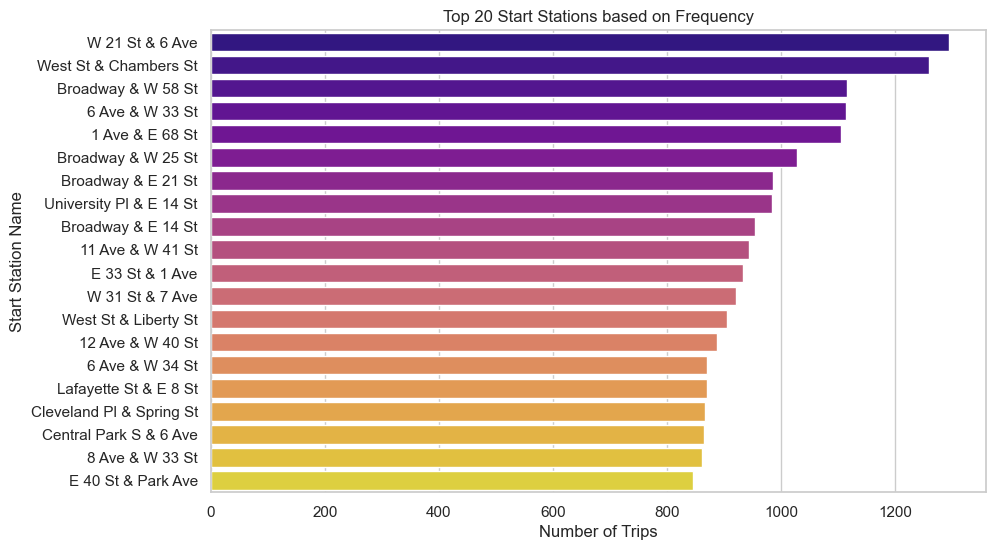

In [13]:
# Plot bar chart with 'hue' mapped to 'start_station_name' for colour variation
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20, x='count', y='start_station_name', hue='start_station_name', palette=colors, dodge=False)
plt.title("Top 20 Start Stations based on Frequency")
plt.xlabel("Number of Trips")
plt.ylabel("Start Station Name")
plt.show()

### Choosing the Color Palette for the Bar Chart of Top 20 Starting Stations

When deciding between the `plasma` palette and the `Blues_r` palette for the bar chart, it's important to consider the nature of the data and the goal of the visualization.

#### **1. Using `plasma` Palette:**
- **Appearance:** The `plasma` palette provides a perceptually uniform gradient, moving from dark purple to yellow.
- **Use Case:** Best suited for continuous data or when we want to highlight the magnitude of values using a smooth gradient.
- **Pros:**
  - Offers good contrast and works well for representing continuous data.
  - Colorblind-friendly and perceptually uniform, making it easy to distinguish values in a range.
- **Cons:**
  - Might not clearly distinguish individual categories (stations) when we have a limited number like 20.

#### **2. Using `Blues_r` Palette:**
- **Appearance:** The `Blues_r` palette uses shades of blue, ranging from light to dark, with the reverse order (dark to light) applied.
- **Use Case:** Ideal for categorical data, especially when you have a fixed number of categories (like the top 20 starting stations).
- **Pros:**
  - Ensures clear differentiation between individual categories.
  - Provides a cleaner, more readable chart with distinct colors for each bar.
- **Cons:**
  - May not have the dynamic, engaging gradient effect seen in `plasma`.

#### **Conclusion:**
For the bar chart depicting the top 20 starting stations, the **`Blues_r`** palette is the better choice. It will clearly differentiate each of the stations, making the chart easy to read. The `plasma` palette, while visually appealing and suitable for continuous data, might not offer the clarity needed for categorical data with limited categories (like the top 20 stations). Therefore, a discrete colour palette such as `"Blues_r"` is recommended for this task.

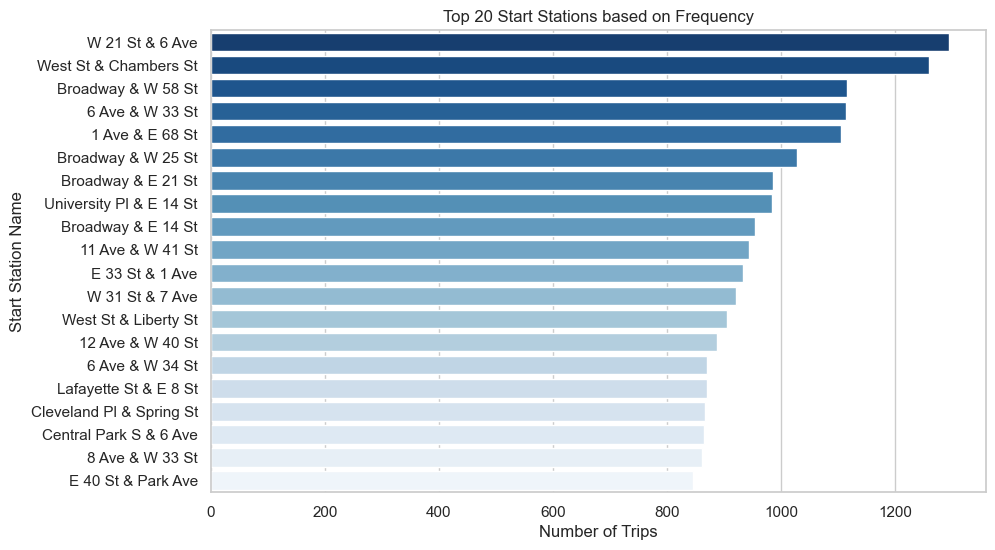

In [14]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20, x='count', y='start_station_name', hue='start_station_name', palette="Blues_r", dodge=False)
plt.title("Top 20 Start Stations based on Frequency")
plt.xlabel("Number of Trips")
plt.ylabel("Start Station Name")
plt.show()

# Recreate the dual-axis line plot from the previous Exercise using seaborn

In [15]:
# Convert the 'date' column to datetime format for proper handling of dates in analysis
# The format '%Y-%m-%d' specifies that the date is in the 'year-month-day' format
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [16]:
# Reset the index to treat 'ride_id' as a regular column
df_reset = df.reset_index()

In [17]:
# Groupby the count of the trips 
df_group = pd.DataFrame(df_reset.groupby(['date'])['ride_id'].count()).reset_index()

In [18]:
df_group.head()

,date,ride_id
0,2022-01-01,205
1,2022-01-02,445
2,2022-01-03,330
3,2022-01-04,353
4,2022-01-05,336


In [19]:
# Rename the 'ride_id' column to 'trips_per_day' for clarity, as it represents the number of trips per day
df_group.rename(columns = {'ride_id':'trips_per_day'}, inplace = True)

In [20]:
# Merge the grouped DataFrame (df_group) with the original DataFrame (df_reset) on the 'date' column
# The 'outer' join ensures all dates from both DataFrames are included, and '_merge' will show where the rows come from
df = df_reset.merge(df_group, on = "date", how = 'outer', indicator = True)

In [21]:
# Print the count of rows from each DataFrame in the merged DataFrame, including missing values (NaN)
# The '_merge' column indicates whether a row came from both DataFrames or just one of them
print(df['_merge'].value_counts(dropna = False))

_merge
both          298380
left_only          0
right_only         0
Name: count, dtype: int64


In [22]:
# Check and print the shape
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape)
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape)

# Sort the DataFrame by 'date' and set it as the index to allow for time-based analysis
df_temp = df.set_index('date')

# Print the column names of the sorted DataFrame to verify the changes
print(df_temp.columns)

Shape of January 1st is (205, 16)
Shape of January 2nd is (445, 16)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'avgTemp', 'count',
       'trips_per_day', '_merge'],
      dtype='object')


In [23]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,count,trips_per_day,_merge
date,,,,,,,,,,,,,,,
2022-01-01,0360019220B858ED,classic_bike,2022-01-01 15:49:46.419,2022-01-01 16:05:07.868,Little West St & 1 Pl,West St & Liberty St,40.705693,-74.016777,40.711444,-74.014847,casual,11.6,1,205,both
2022-01-01,93ADC99756FA81A7,classic_bike,2022-01-01 23:44:41.812,2022-01-01 23:55:25.595,2 Ave & E 125 St,E 91 St & 2 Ave,40.802554,-73.933509,40.781153,-73.949630,member,11.6,1,205,both
2022-01-01,7D829F07CA904AA2,classic_bike,2022-01-01 00:51:22.555,2022-01-01 00:59:26.449,Morton St & Washington St,Morton St & Washington St,40.731150,-74.008870,40.731150,-74.008870,member,11.6,1,205,both
2022-01-01,FB85B0444A0087B6,classic_bike,2022-01-01 16:00:58.504,2022-01-01 16:22:51.029,Clinton Ave & Myrtle Ave,White St & Johnson Ave,40.693261,-73.968896,40.707174,-73.935810,member,11.6,1,205,both
2022-01-01,BE60008AA6B47AF4,classic_bike,2022-01-01 13:34:53.843,2022-01-01 13:38:22.073,Catherine St & Monroe St,Fulton St & Pearl St,40.711174,-73.996826,40.707722,-74.004386,member,11.6,1,205,both


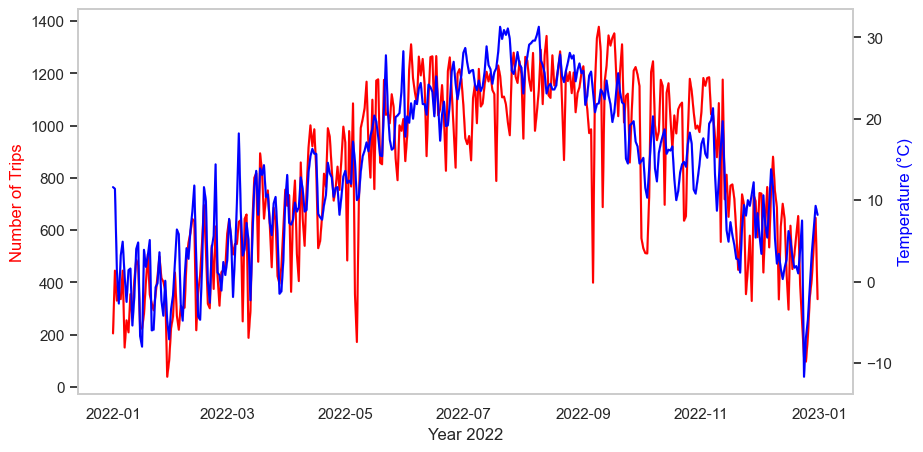

In [24]:
# Create the figure and axis objects for the plots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Use seaborn to plot trips_per_day on the first axis
sns.lineplot(data=df_temp, x=df_temp.index, y='trips_per_day', ax=ax1, color='red')
ax1.set_ylabel('Number of Trips', color='red')

# Create a second axis to plot the temperature
ax2 = ax1.twinx()

# Plot avgTemp on the second axis using seaborn
sns.lineplot(data=df_temp, x=df_temp.index, y='avgTemp', ax=ax2, color='blue')
ax2.set_ylabel('Temperature (°C)', color='blue')

# Change the x-axis label to 'Year 2022'
ax1.set_xlabel('Year 2022')

# Remove grid from both axes
ax1.grid(False)
ax2.grid(False)

# Show the plot
plt.show()

# Make a box plot of one of the categorical variables in your data set

In [25]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
end_station_name              object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
count                          int64
trips_per_day                  int64
_merge                      category
dtype: object

In [26]:
# Rename the 'member_casual' column to 'user_type'
df.rename(columns={'member_casual': 'user_type'}, inplace=True)

In [27]:
df['user_type']

0         casual
1         member
2         member
3         member
4         member
           ...  
298375    member
298376    casual
298377    member
298378    member
298379    member
Name: user_type, Length: 298380, dtype: object

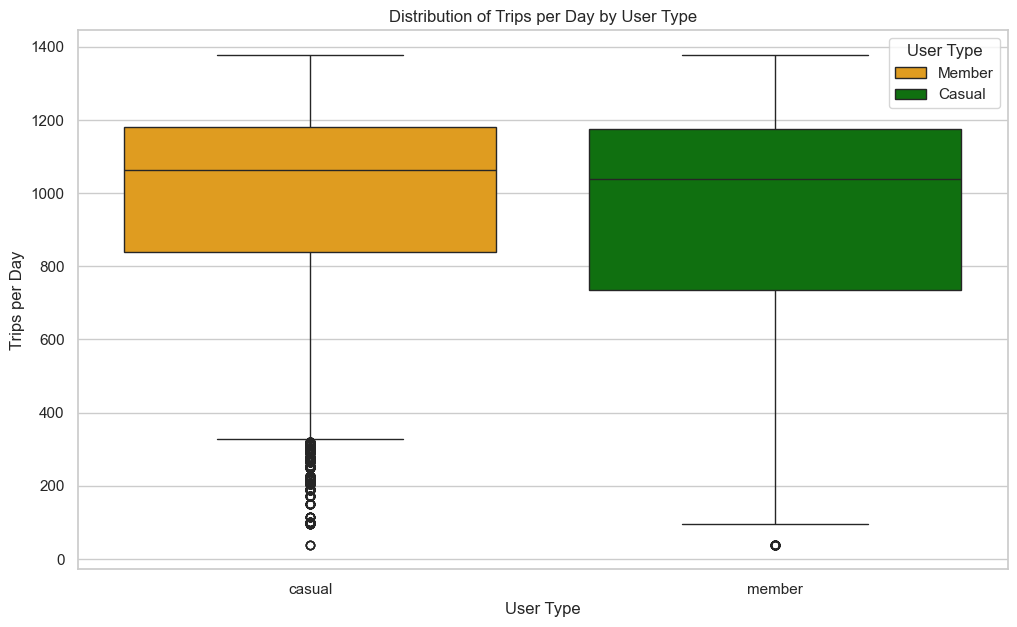

In [28]:
# Create a box plot to show the distribution of trips per day by user type with proper color mapping
plt.figure(figsize=(12, 7))
sns.boxplot(x='user_type', y='trips_per_day', data=df, hue='user_type', palette={'member': 'green', 'casual': 'orange'})
plt.title("Distribution of Trips per Day by User Type")
plt.xlabel("User Type")
plt.ylabel("Trips per Day")
plt.legend(title='User Type', loc='upper right', labels=['Member', 'Casual'])  # Optional: Adds a legend
plt.show()

## Analysis of Trips per Day by User Type

The box plot shows that both **Casual** and **Member** users have a median daily trip count slightly above **1000**, with members displaying a wider interquartile range (IQR), indicating greater variability. Members have a larger spread in trips per day, while casual users show more lower-end outliers, suggesting occasional days with significantly fewer trips. The whiskers extend further for members, meaning their trip counts fluctuate more widely than those of casual users. Members exhibit a more varied trip pattern, whereas casual users' trips are more concentrated but occasionally drop significantly.

# Create a FacetGrid

In [33]:
# Extract hour from the 'started_at' column
df['hour_of_day'] = pd.to_datetime(df['started_at']).dt.hour

# Categorize into Morning, Afternoon, Evening, Night
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour_of_day'].apply(categorize_time)

# Define the order for FacetGrid
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

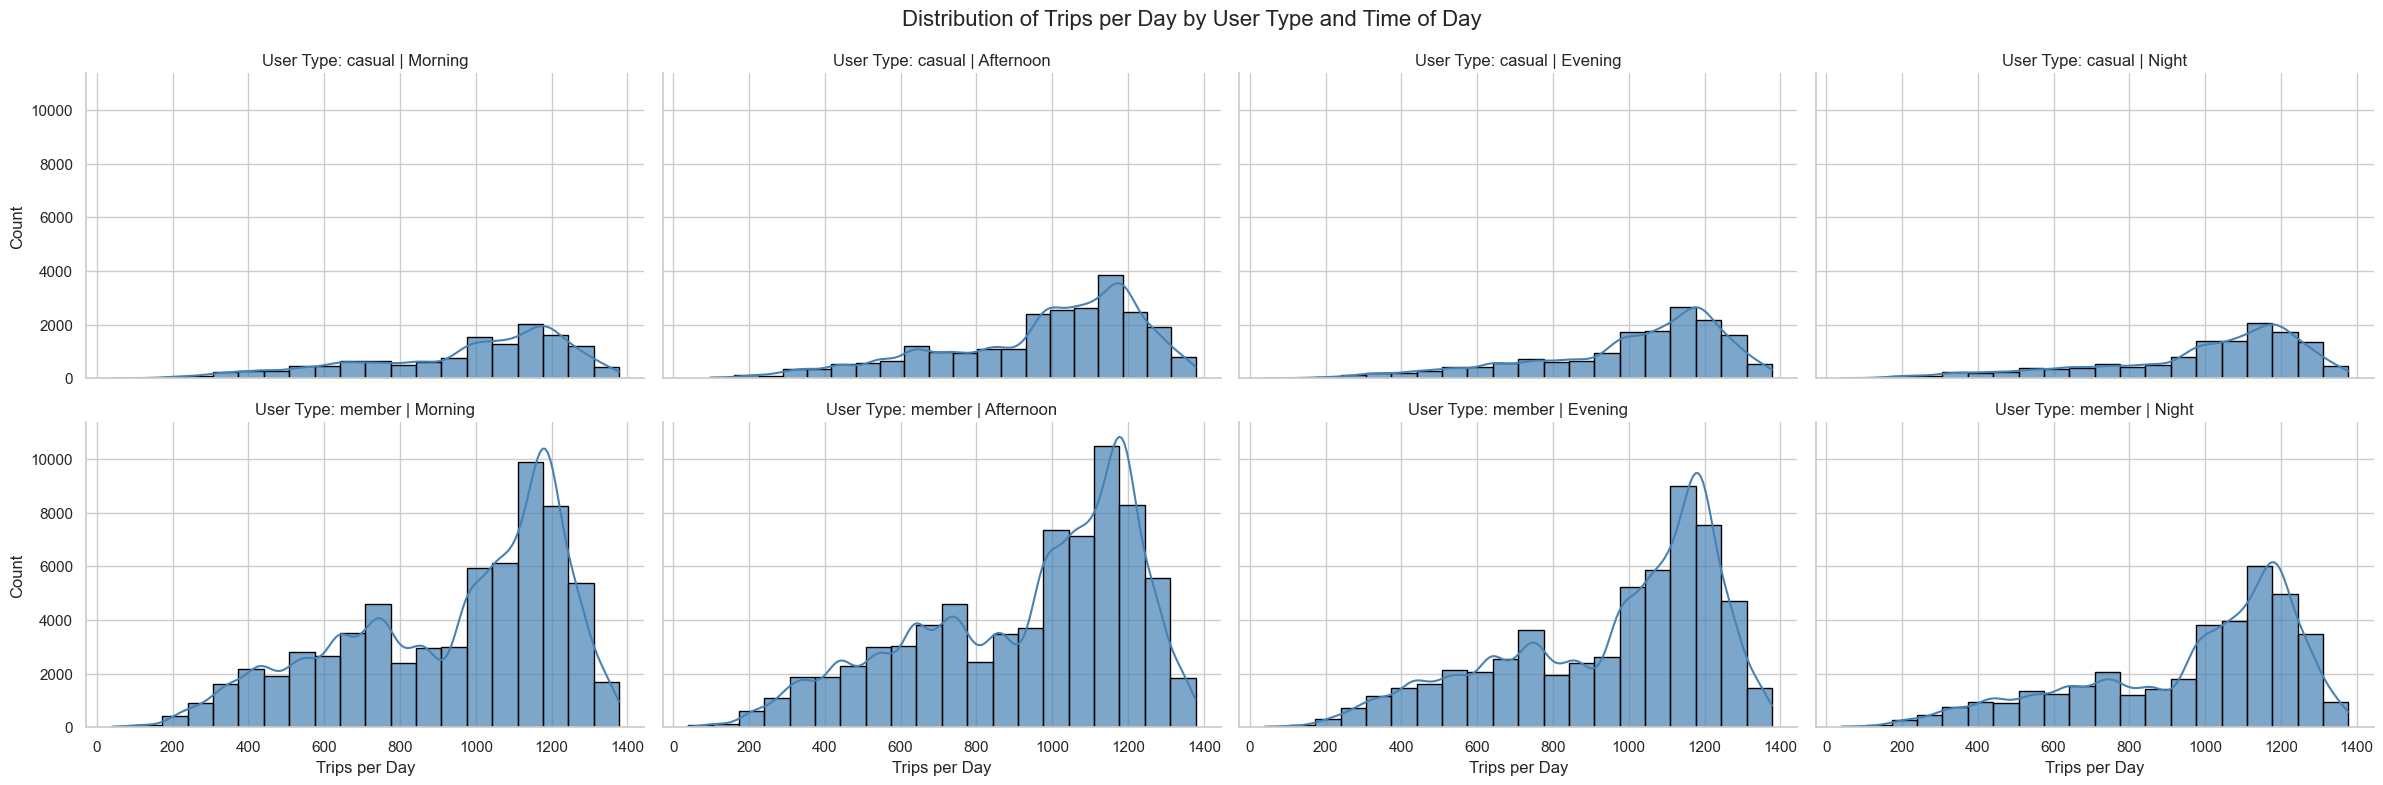

In [34]:
# Create a FacetGrid with the specified order
grid = sns.FacetGrid(df, col="time_of_day", row="user_type", height=4, aspect=1.5, col_order=time_order)

# Improve visibility with edge color and transparency
grid.map(sns.histplot, "trips_per_day", bins=20, kde=True, color="steelblue", edgecolor="black", alpha=0.7)

# Adjust titles and labels for better readability
grid.set_axis_labels("Trips per Day", "Count")
grid.set_titles(col_template="{col_name}", row_template="User Type: {row_name}")
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle("Distribution of Trips per Day by User Type and Time of Day", fontsize=16)

plt.show()

### Distribution of Trips per Day by User Type and Time of Day

The FacetGrid plot visualizes the distribution of daily trips across different user types (casual vs. member) and times of the day (Morning, Afternoon, Evening, Night).

#### Analysis:

- **Casual Users**: The trip distribution shows that casual users take more trips in the **afternoon and evening**, with fewer trips in the morning and night. This suggests that casual users are more likely to use the service for leisure or non-commuting purposes.
- **Member Users**: Members consistently take a high number of trips throughout the day, with only the **night period showing a noticeable drop**. This indicates that members likely use the service for daily commuting or frequent transportation needs.
- **Peak Hours**: Casual users peak in the afternoon and evening, whereas members have consistently high usage except at night. This pattern can help in demand forecasting, bike availability planning, and targeted promotions.

Understanding these patterns allows for better decision-making in fleet distribution, pricing strategies, and user engagement campaigns.